# Лабораторная работа №1
## Интеллектуальные агенты
#### _Выполнил: Сарнацкий Владислав_
#### _Группа: ІП-71мн_

<hr />

*Цель работы:* Рассмотреть и исследовать разные типы рациональных агентов. Сравнить эффективность их поведения.

<hr />

Всякие нужные импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

Импортируем среду **Environment** и агентов **ReflexAgent, ReflexModelAgent**

In [2]:
from lab1_agents import *
from lab1_environment import *

Задаем правила поведения рефлексивного агента:

Формат правил **_восприятие : действие_**
Виды восприятий:
- dirty: клетка под агентом грязная;
- top: что-то уперлось в агента сверху;
- left: что-то уперлось в агента слева;
- right: что-то уперлось в агента справа;
- bottom: что-то уперлось в агента снизу.

Виды действий:
- move_random: двигаться в произвольном направлении;
- move_up: двигаться вверх;
- move_left: двигаться влево;
- move_right: двигаться вправо;
- move_down: двигаться вниз;
- suck: всасывать грязь с клетки под агентом.

Если восприятий в один момент времени несколько, они разделяются символом "_"

In [3]:
reflex_rules = {
    '': 'move_random',
    'dirty': 'suck',
    'dirty_bottom': 'suck',
    'dirty_right': 'suck',
    'dirty_top': 'suck',
    'dirty_left': 'suck',
    'bottom': 'move_random',
    'right': 'move_random',
    'top': 'move_random',
    'left': 'move_random',
}

In [4]:
def get_dirt_level(state):
    return (state * (state > 0)).mean()

Смотрим на поведение агента первые 36 итераций.

- _Темно-бардовым_ обозначено местоположение агента;
- _Желтым_ обозначена грязь;
- _Оранжевый_ обозначено пустое пространство;
- _Коричневым_ обозначены стены.

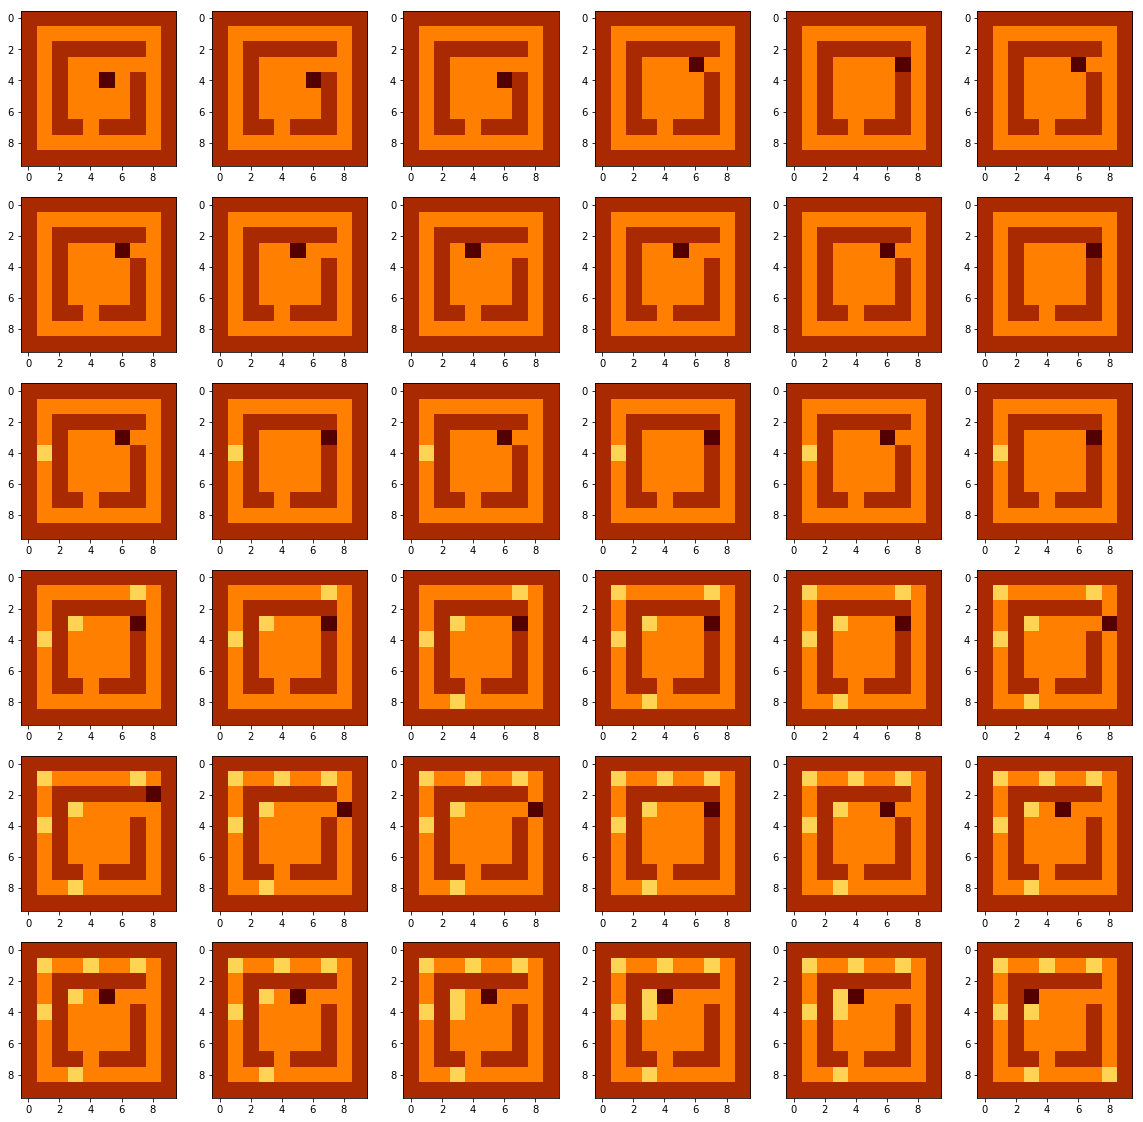

In [5]:
cols, rows = 6, 6
env = Environment(ReflexAgent(reflex_rules, log=False), 1, log=False)
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
states = np.stack(list(map(lambda iter: env.step(), range(cols * rows))))

for i in range(states.shape[0]):
    ax[i // rows, i % cols].imshow(states[i], cmap='afmhot').set_clim(vmin=-3, vmax=3)
plt.show()

Вывод: агент действует не рационально.

<hr />

Используем рефлексивного агента на основе модели. Главное его отличие от простого рефлексивного агента - он не ходит в обратном направлении. Другими словами: если он пошел влево, то на следующем ходу пойдет либо влево, либо вверх, либо вниз.

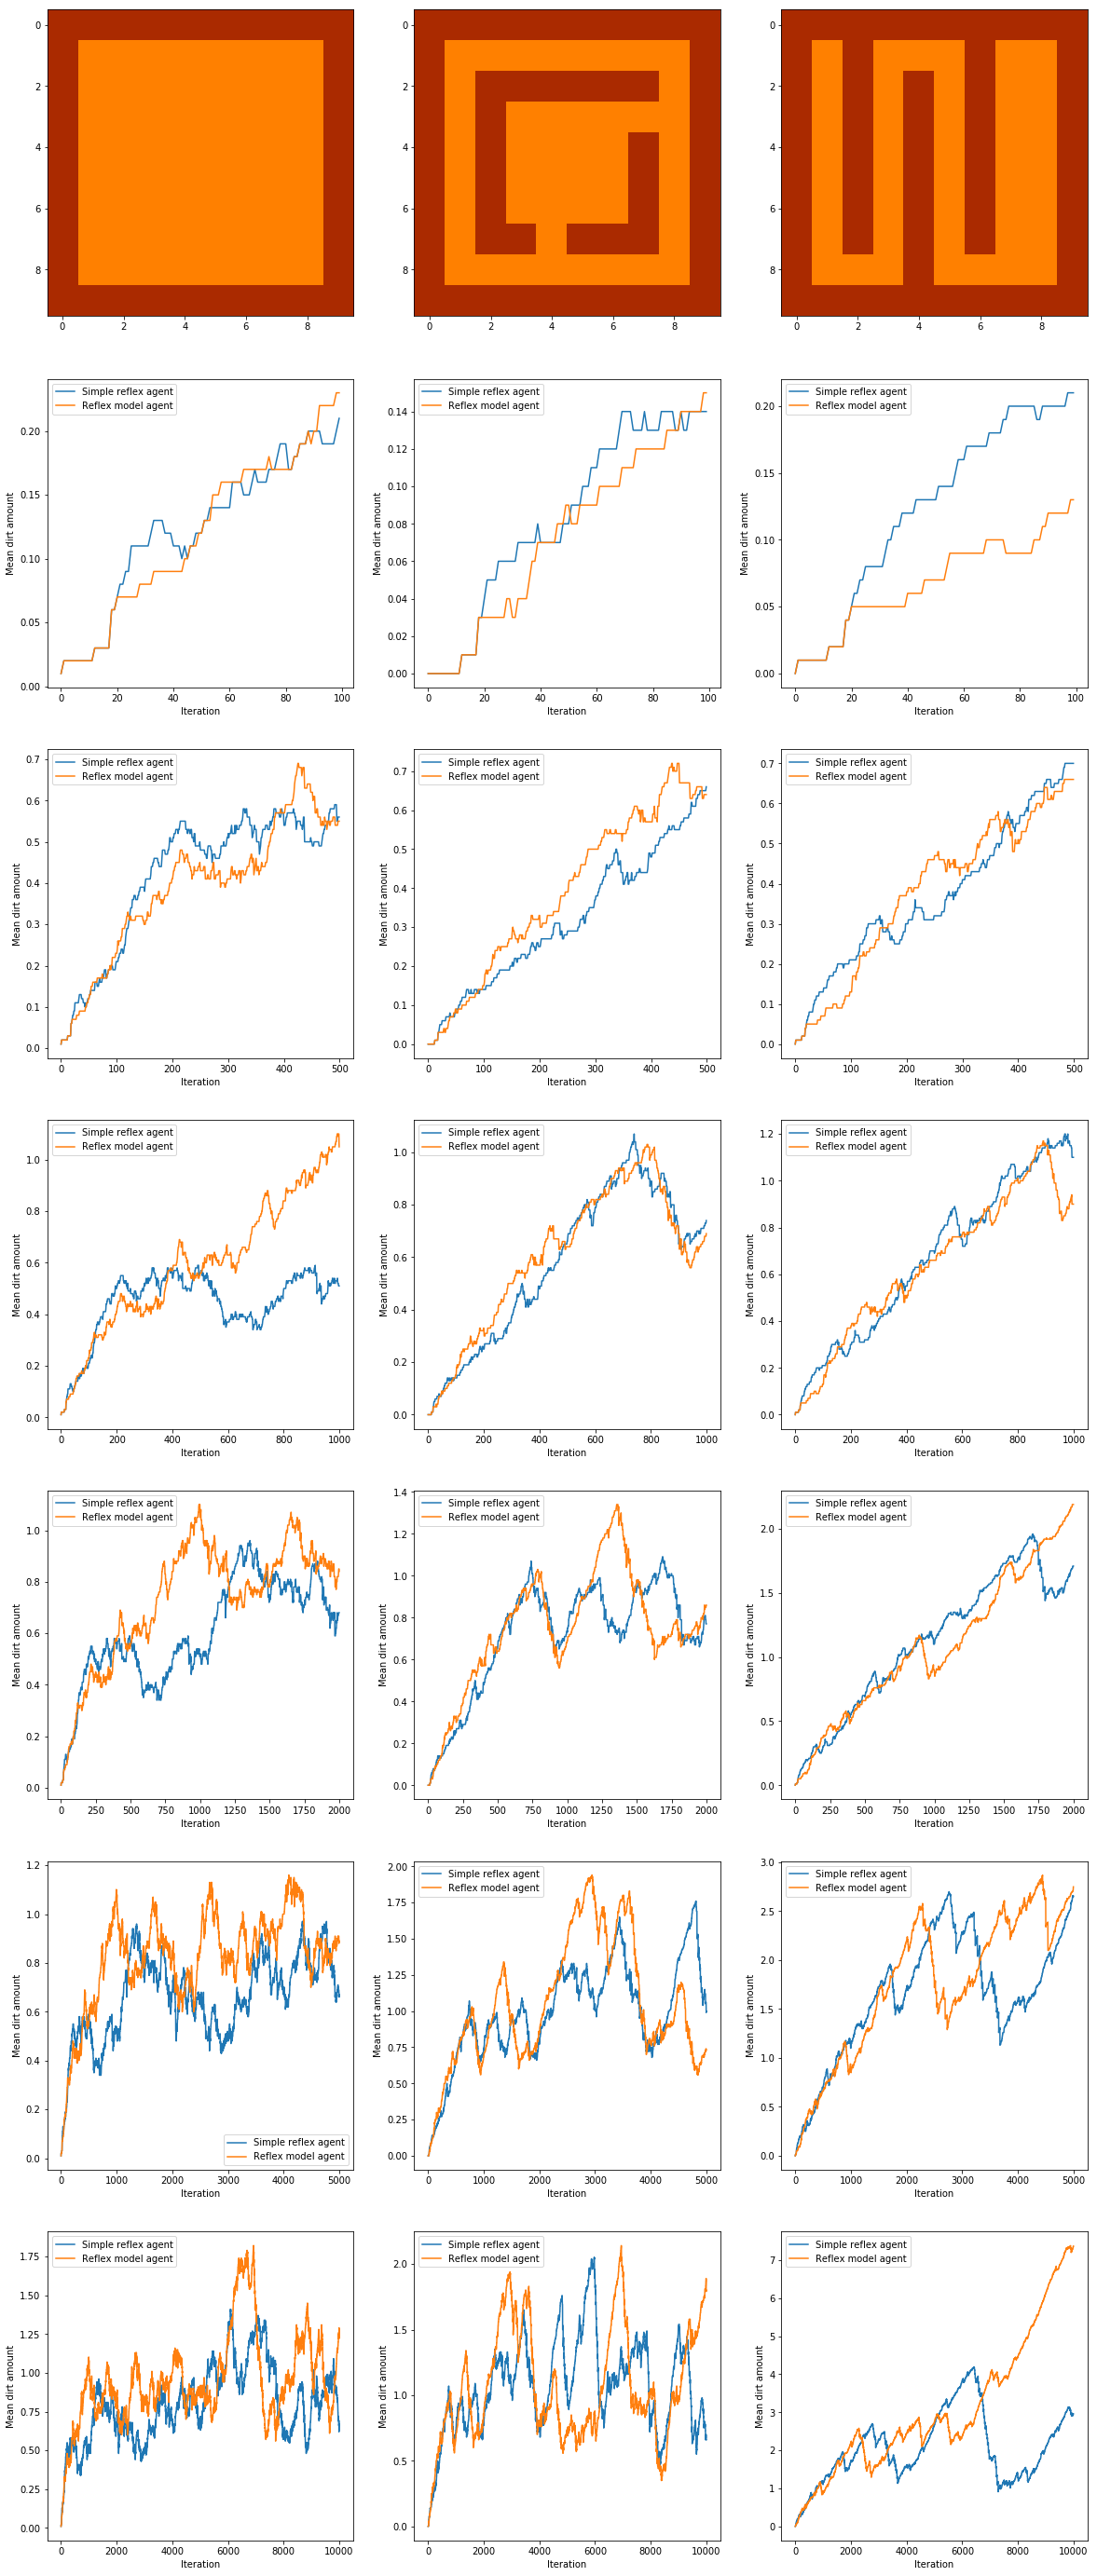

In [6]:
df_result = pd.DataFrame(columns=['Iterations', 'Reflex agent', 'Reflex model agent'])
fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(20,50))
for field_index in range(len(fields)):
    ax[0, field_index].imshow(fields[field_index], cmap='afmhot').set_clim(vmin=-3, vmax=3)
    for i, iterations in enumerate([100, 500, 1000, 2000, 5000, 10000]):
        env = Environment(ReflexAgent(reflex_rules, log=False), field_index, 0.005, log=False)
        reflex_states = np.stack(list(map(lambda iter: env.step(), range(iterations))))
        env = Environment(ReflexModelAgent(reflex_rules, log=False), field_index, 0.005, log=False)
        reflex_model_states = np.stack(list(map(lambda iter: env.step(), range(iterations))))

        reflex_mean_dirt = list(map(lambda state: get_dirt_level(state), reflex_states))
        reflex_model_mean_dirt = list(map(lambda state: get_dirt_level(state), reflex_model_states))

        df_result.loc[i] = [iterations, get_dirt_level(reflex_states), get_dirt_level(reflex_model_states)]

        ax[i + 1, field_index].plot(reflex_mean_dirt, label='Simple reflex agent')
        ax[i + 1, field_index].plot(reflex_model_mean_dirt, label='Reflex model agent')
        ax[i + 1, field_index].set_xlabel('Iteration')
        ax[i + 1, field_index].set_ylabel('Mean dirt amount')
        ax[i + 1, field_index].legend()
plt.legend()
plt.show()

Как можно заметить из графиков, даже небольшое увеличение интеллектуальности агента спрособно повысить рациональность его действий для некоторых конфигураций среды.
Хотя в целом, его эффективность падает со временем и не отличается от первого агента. (Не касается третей конфигурации - в ней, похоже что, агент застрял в тупике и неспособен выйти из него)

### Выводы
- Рассмотрел и исследовал разные типы рациональных агентов. Сравнил эффективность их поведения;
- Полученные результаты показывают, что рефлексивный агент на основе модели (полный "потенциал" которого не был раскрыт) в среднем не отличается от простого рефлексивного агента.